# 1. Perkenalan Dataset


## Customer Purchases Behaviour Dataset
Dataset yang digunakan dalam proses clustering ini berasal dari [Kaggle - Customer Purchases Behaviour Dataset](https://www.kaggle.com/datasets/sanyamgoyal401/customer-purchases-behaviour-dataset). Dataset ini berisi data simulasi yang merepresentasikan perilaku pembelian pelanggan. Dataset ini mencakup berbagai fitur seperti usia, jenis kelamin, pendapatan, tingkat pendidikan, wilayah, status loyalitas, frekuensi pembelian, jumlah pembelian, kategori produk, penggunaan promosi, dan skor kepuasan.

### Informasi File:
* Format File: CSV
* Jumlah Baris: 10.000
* Jumlah Kolom: 12
* Kategorikal: gender, education, region, loyalty_status, purchase_frequency, product_category
* Numerikal: id, age, income, purchase_amount, promotion_usage, satisfaction_score

### Deskripsi Kolom

Dataset terdiri dari beberapa fitur utama berikut:
* age: Usia pelanggan.
* gender: Jenis kelamin pelanggan (0 untuk Laki-laki, 1 untuk Perempuan).
* income: Pendapatan tahunan pelanggan.
* education: Tingkat pendidikan pelanggan.
* region: Wilayah tempat tinggal pelanggan.
* loyalty_status: Status loyalitas pelanggan.
* purchase_frequency: Frekuensi pembelian yang dilakukan oleh pelanggan.
* purchase_amount: Jumlah uang yang dihabiskan pelanggan pada setiap pembelian.
* product_category: Kategori produk yang dibeli.
* promotion_usage: Menunjukkan apakah pelanggan menggunakan penawaran promosi (0 untuk Tidak, 1 untuk Ya).
* satisfaction_score: Skor kepuasan pelanggan.


# 2. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. Load Dataset

In [ ]:
file_path = '/content/drive/MyDrive/Submission/customer_data.csv'
df = pd.read_csv(file_path)
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


# 4. Exploratory Data Analysis (EDA)

In [ ]:
df.shape

(100000, 12)

In [ ]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [ ]:
df.tail()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
99995,99996,31,Female,19691,College,West,Regular,occasional,7075,Health,0,7
99996,99997,36,Male,17428,HighSchool,South,Regular,rare,6873,Health,0,5
99997,99998,29,Male,13222,College,West,Regular,frequent,5152,Clothing,0,5
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5
99999,100000,35,Female,22249,College,West,Silver,rare,9426,Health,0,6


In [ ]:
df.isna().sum()

,0
id,0
age,0
gender,0
income,0
education,0
region,0
loyalty_status,0
purchase_frequency,0
purchase_amount,0
product_category,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


In [ ]:
categorical_features = ['gender', 'education', 'region', 'loyalty_status', 'purchase_frequency', 'product_category']

df[categorical_features].nunique()

,0
gender,2
education,4
region,4
loyalty_status,3
purchase_frequency,3
product_category,7


In [ ]:
for features in categorical_features:
    unique_values = df[features].unique()
    print(f"{features}: {unique_values}")

gender: ['Male' 'Female']
education: ['Bachelor' 'Masters' 'HighSchool' 'College']
region: ['East' 'West' 'South' 'North']
loyalty_status: ['Gold' 'Regular' 'Silver']
purchase_frequency: ['frequent' 'rare' 'occasional']
product_category: ['Books' 'Clothing' 'Food' 'Electronics' 'Home' 'Beauty' 'Health']


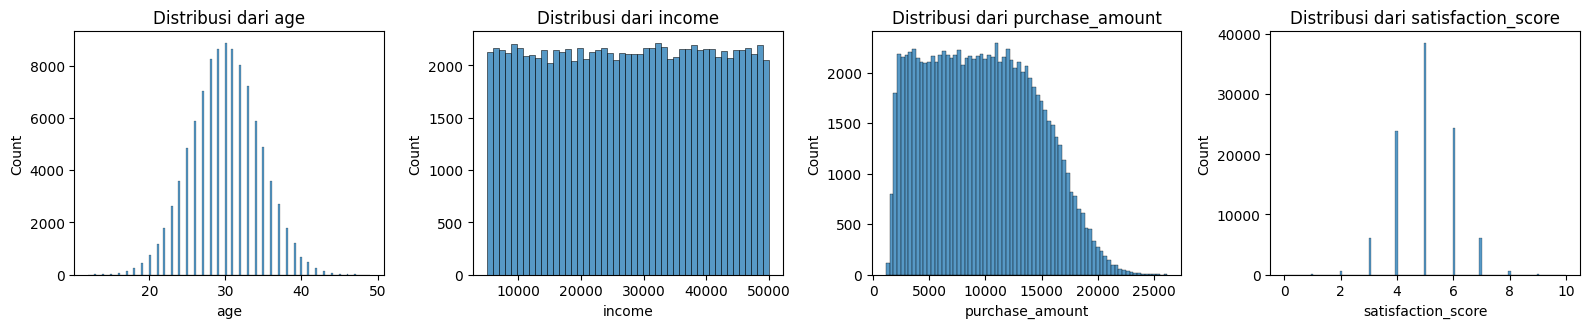

In [ ]:
numerical_features = ['age','income','purchase_amount','satisfaction_score'] #without promotional usage karena valuenya hanya binary

plt.figure(figsize=(16,12))
for i, features in enumerate(numerical_features):
    plt.subplot(4,4,i+1)
    sns.histplot(x=df[features])
    plt.title(f'Distribusi dari {features}')
plt.tight_layout()
plt.show()

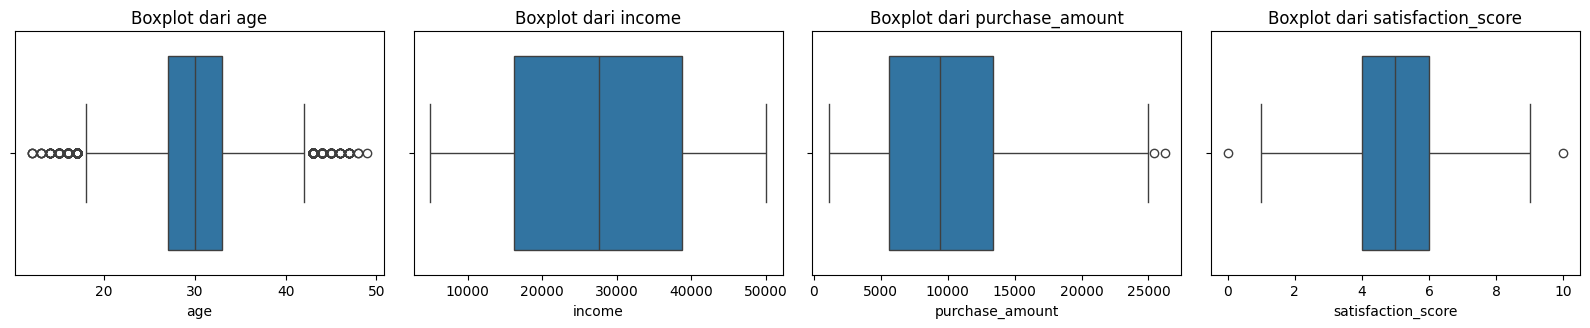

In [ ]:
plt.figure(figsize=(16,12))
for i, features in enumerate(numerical_features):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=df[features])
    plt.title(f'Boxplot dari {features}')
plt.tight_layout()
plt.show()

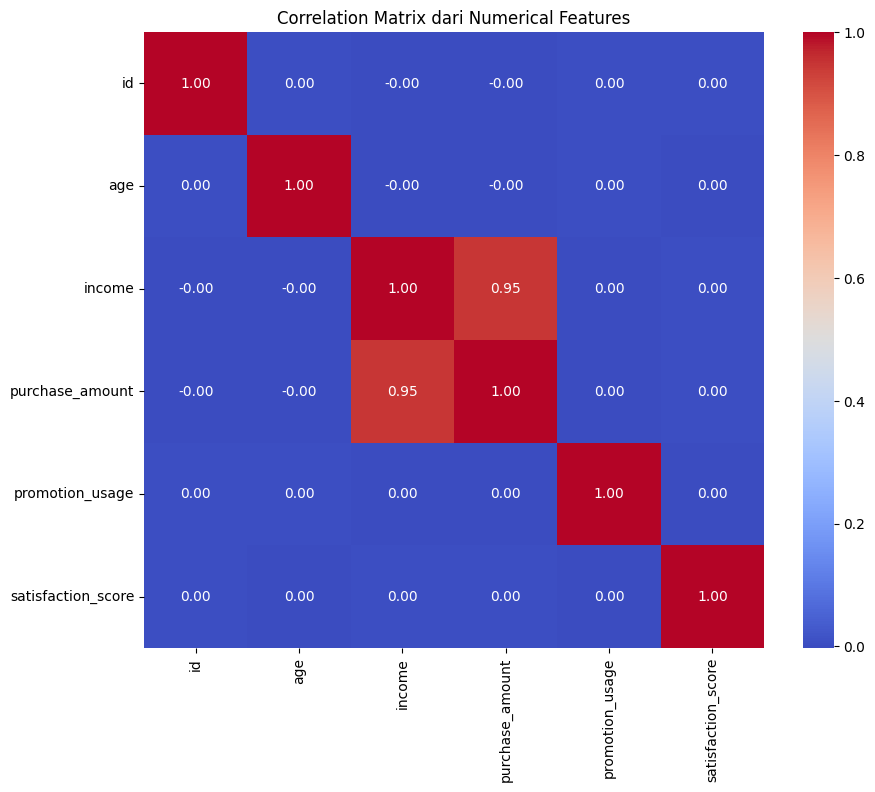

In [ ]:
correlation_matrix =  df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix dari Numerical Features')
plt.show()

# 5. Data Preprocessing

In [ ]:
df_clean = df.drop('id', axis=1)
df_clean.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [ ]:
# encode manual with mapping for gender, education , loyalty status, dan purchace frequency

df_clean['gender'] = df_clean['gender'].map({'Male': 0, 'Female': 1})

#mapping education (HighSchool < College < Bachelor < Masters < PhD)
df_clean['education'] = df_clean['education'].map({'HighSchool': 0, 'College': 1, 'Bachelor': 2, 'Masters': 3, 'PhD': 4})

# Mapping loyalty_status (Gold > Silver > Regular)
df_clean['loyalty_status'] = df_clean['loyalty_status'].map({'Regular': 0, 'Silver': 1, 'Gold': 2})

# Mapping purchase_frequency (rare < occasional < frequent)
df_clean['purchase_frequency'] = df_clean['purchase_frequency'].map({'rare': 0, 'occasional': 1, 'frequent': 2})

In [ ]:
df_clean.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,0,40682,2,East,2,2,18249,Books,0,6
1,29,0,15317,3,West,0,0,4557,Clothing,1,6
2,37,0,38849,2,West,1,0,11822,Clothing,0,6
3,30,0,11568,0,South,0,2,4098,Food,0,7
4,31,1,46952,1,North,0,1,19685,Clothing,1,5


In [ ]:
# encode using OHE
ohe_features = ['region', 'product_category']

ohe = OneHotEncoder(sparse_output=False)
ohe_df = pd.DataFrame(
    ohe.fit_transform(df_clean[ohe_features]),
    columns=ohe.get_feature_names_out(),
    index=df_clean.index
)

df_encoded = pd.concat([df_clean.drop(ohe_features, axis=1), ohe_df], axis=1)
df_encoded.head()

,age,gender,income,education,loyalty_status,purchase_frequency,purchase_amount,promotion_usage,satisfaction_score,region_East,region_North,region_South,region_West,product_category_Beauty,product_category_Books,product_category_Clothing,product_category_Electronics,product_category_Food,product_category_Health,product_category_Home
0,27,0,40682,2,2,2,18249,0,6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,29,0,15317,3,0,0,4557,1,6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,37,0,38849,2,1,0,11822,0,6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,30,0,11568,0,0,2,4098,0,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,31,1,46952,1,0,1,19685,1,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_encoded.describe()

,age,gender,income,education,loyalty_status,purchase_frequency,purchase_amount,promotion_usage,satisfaction_score,region_East,region_North,region_South,region_West,product_category_Beauty,product_category_Books,product_category_Clothing,product_category_Electronics,product_category_Food,product_category_Health,product_category_Home
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000
mean,30.003260,0.500740,27516.269880,1.298800,0.497600,0.70076,9634.790840,0.300800,5.009650,0.300740,0.199180,0.200730,0.299350,0.050350,0.149250,0.199890,0.300270,0.14822,0.101230,0.05079
std,4.480535,0.500002,12996.782587,0.898035,0.669297,0.78205,4799.339449,0.458608,1.038714,0.458582,0.399386,0.400548,0.457976,0.218667,0.356337,0.399919,0.458378,0.35532,0.301635,0.21957
min,12.000000,0.000000,5000.000000,0.000000,0.000000,0.00000,1118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,27.000000,0.000000,16271.750000,1.000000,0.000000,0.00000,5583.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
50%,30.000000,1.000000,27584.500000,1.000000,0.000000,0.00000,9452.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
75%,33.000000,1.000000,38747.250000,2.000000,1.000000,1.00000,13350.000000,1.000000,6.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.00000
max,49.000000,1.000000,50000.000000,3.000000,2.000000,2.00000,26204.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


# 6. Pembangunan Model Clustering

## a. Pembangunan Model Clustering

In [ ]:
# kmeans dan silhouette score awal

silhouette_scores = []
range_n_clusters = range(2, 6)

# cluster dari 2 sampai 10
for n_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  labels = kmeans.fit_predict(df_encoded)

  score = silhouette_score(df_encoded, labels)
  silhouette_scores.append(score)

  print(f"n_clusters = {n_clusters}, silhouette_score = {score:.4f}")

n_clusters = 2, silhouette_score = 0.6125
n_clusters = 3, silhouette_score = 0.5621
n_clusters = 4, silhouette_score = 0.5299
n_clusters = 5, silhouette_score = 0.5028


## b. Evaluasi Model Clustering

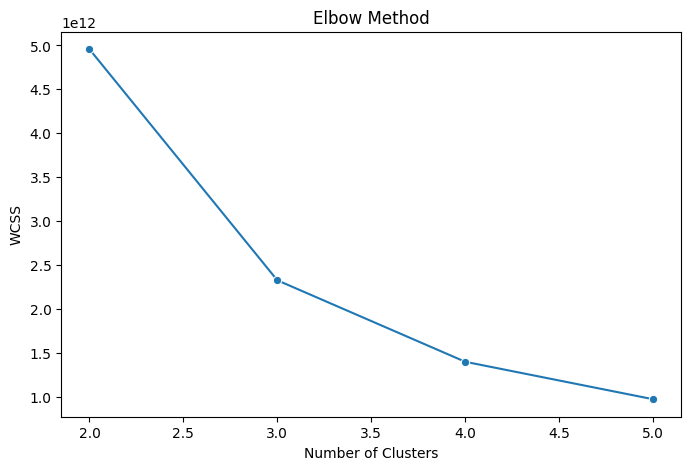

In [ ]:
# elbow method

wcss = []

for n_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  kmeans.fit(df_encoded)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
sns.lineplot(x=range_n_clusters, y=wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## c. Feature Selection (Opsional)

In [ ]:
selected_features = ['age', 'income', 'purchase_frequency', 'purchase_amount', 'satisfaction_score']
feature_selected = df_encoded[selected_features]

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(feature_selected)
    score = silhouette_score(feature_selected, labels)
    print(f"n_clusters = {k}, silhouette score = {score:.4f}")

n_clusters = 2, silhouette score = 0.6125
n_clusters = 3, silhouette score = 0.5621
n_clusters = 4, silhouette score = 0.5300
n_clusters = 5, silhouette score = 0.5025
n_clusters = 6, silhouette score = 0.4847


In [ ]:
# final model
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
labels = kmeans.fit_predict(feature_selected)
centroids = kmeans.cluster_centers_

score = silhouette_score(feature_selected, labels)
print(f"n_clusters = {optimal_k}, silhouette score = {score:.4f}")

n_clusters = 2, silhouette score = 0.6125


In [ ]:
# assign juga hasil ke df cleaned untuk klasifikasi
df_clean['cluster'] = labels
df_clean.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,cluster
0,27,0,40682,2,East,2,2,18249,Books,0,6,1
1,29,0,15317,3,West,0,0,4557,Clothing,1,6,0
2,37,0,38849,2,West,1,0,11822,Clothing,0,6,1
3,30,0,11568,0,South,0,2,4098,Food,0,7,0
4,31,1,46952,1,North,0,1,19685,Clothing,1,5,1


## d. Visualisasi Hasil Clustering

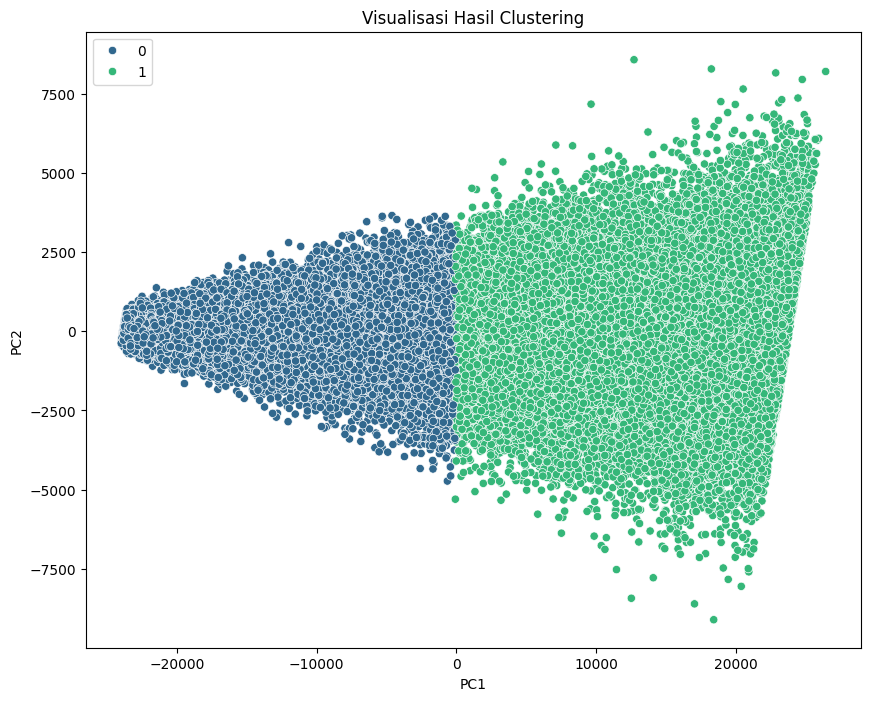

In [ ]:
selected_features = ['age', 'income', 'purchase_frequency', 'purchase_amount', 'satisfaction_score']
feature_selected = df_encoded[selected_features]

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(feature_selected)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['cluster'] = labels


plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=reduced_df, palette='viridis')
plt.title('Visualisasi Hasil Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

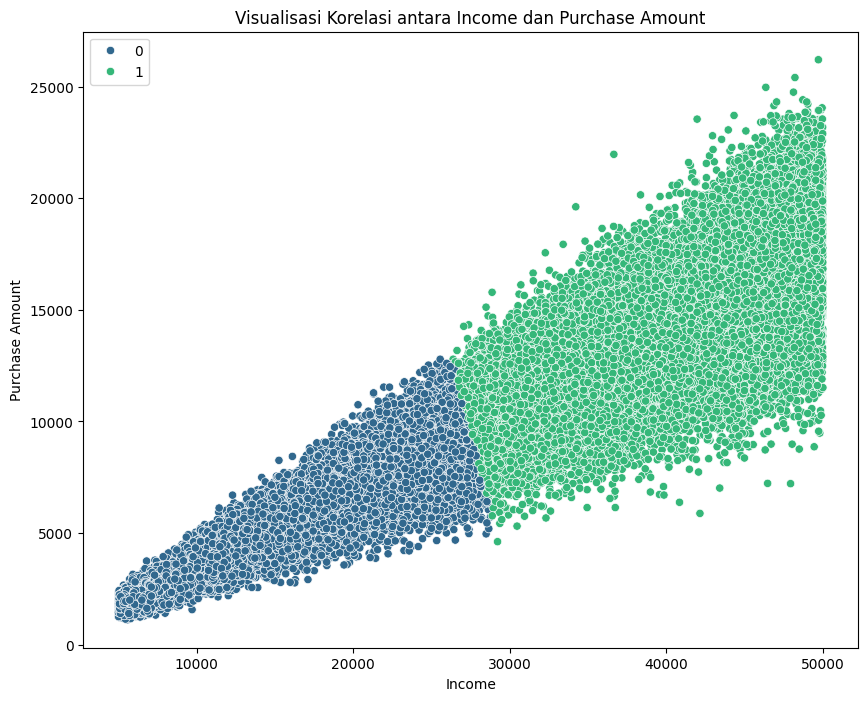

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='income', y='purchase_amount', hue='cluster', data=df_clean, palette='viridis')
plt.title('Visualisasi Korelasi antara Income dan Purchase Amount')
plt.xlabel('Income')
plt.ylabel('Purchase Amount')
plt.legend()
plt.show()

## e. Analisis dan Interpretasi Hasil Cluster

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_clean, title="Cluster Profiling Report", explorative=True)
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
cluster_summary = df_clean.select_dtypes(include='number').groupby('cluster').mean().T
display(cluster_summary)

cluster,0,1
age,30.013910,29.992717
gender,0.501558,0.499930
income,16206.159199,38713.394241
education,1.294981,1.302581
loyalty_status,0.499166,0.496050
purchase_frequency,0.703029,0.698513
purchase_amount,5647.424390,13582.324093
promotion_usage,0.299242,0.302342
satisfaction_score,5.005769,5.013492


### Analisis Karakteristik Cluster dari Model KMeans

Berikut hasil analisis dari hasil cluster pada dataset "Customer Purchases Behaviour Dataset":

**1.   Cluster 0**

* Rata-rata Pendapatan Tahunan (USD): $16206

* Rata-rata Jumlah Pembelian (USD): $5647

* Analisis: Cluster ini terdiri dari pelanggan dengan pendapatan relatif rendah dan tingkat pembelanjaan yang juga tidak terlalu tinggi. Pola ini mengindikasikan bahwa mereka kemungkinan besar lebih selektif atau hemat dalam melakukan pembelian. Mereka cenderung fokus pada pengeluaran yang esensial dan mungkin lebih sensitif terhadap harga.

**2.   Cluster 1**

* Rata-rata Pendapatan Tahunan (USD): $38713

* Rata-rata Jumlah Pembelian (USD): $13582

* Analisis: Pelanggan dalam kelompok ini memiliki pendapatan menengah ke atas dan juga cenderung melakukan pembelanjaan dalam jumlah lebih besar. Hal ini menunjukkan bahwa mereka memiliki kapasitas belanja yang lebih fleksibel. Bisa jadi mereka lebih responsif terhadap penawaran atau promosi, dan mungkin juga memiliki preferensi terhadap produk dengan kualitas atau kenyamanan yang lebih tinggi.



**Kesimpulan Segmentasi**

Berdasarkan hasil clustering, pelanggan dapat diklasifikasikan menjadi dua segmen utama:

* Segmen Ekonomis (Cluster 0): pelanggan dengan
pendapatan rendah dan pengeluaran terbatas. Strategi pemasaran yang tepat untuk segmen ini mencakup promosi diskon, harga ekonomis, dan produk dengan value tinggi.

* Segmen Premium (Cluster 1): pelanggan dengan pendapatan tinggi dan pengeluaran yang besar. Mereka berpotensi menjadi pelanggan setia yang bernilai tinggi, sehingga strategi seperti program loyalitas, personalisasi penawaran, dan promosi eksklusif akan sangat relevan.

Segmentasi ini dapat membantu perusahaan dalam mengembangkan pendekatan pemasaran yang lebih tepat sasaran dan meningkatkan efisiensi strategi bisnis.

# Export Dataframe

In [ ]:
df_clean.to_csv('clustering_results.csv', index=False)
files.download('clustering_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>